# Homework 3

## Pandas and SQL

16.03.2022

Kriti Amin

In [1]:
# Import libraries
import pandas as pd
import re

# Chinook database

- Sample database
- Contains 11 tables
- Used 3 tables
- Downloaded from : https://www.sqlitetutorial.net/sqlite-sample-database/

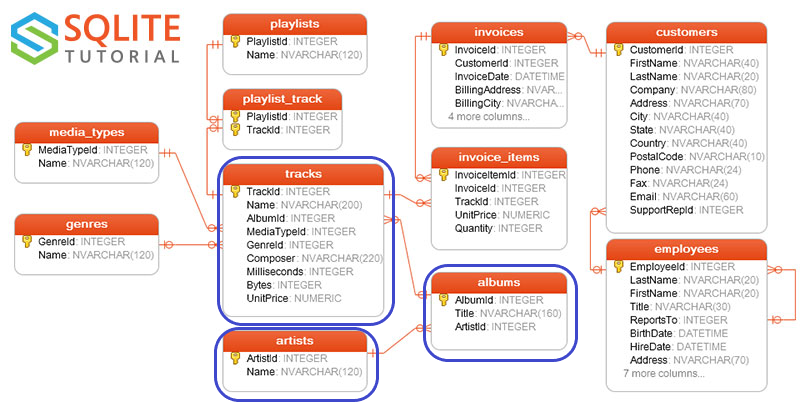

## Load database

In [2]:
db_path = 'db\chinook.db'#'C:\\Users\\kriti\\Desktop\\BioDB\\2-kriti\\Homework\\Day_3\\db\\chinook.db'
con_str = f'sqlite:///{db_path}'

In [3]:
%load_ext sql
%sql sqlite:///chinook.db

# Query tables with pandas from database

- Tracks
- Albums
- Artists

In [4]:
tracks = pd.read_sql_table('tracks', con_str)
albums = pd.read_sql_table('albums', con_str)
artists = pd.read_sql_table('artists', con_str)

## Tracks table

In [5]:
tracks.head(5)

TrackId                                     Name  AlbumId  MediaTypeId  \
0        1  For Those About To Rock (We Salute You)        1            1   
1        2                        Balls to the Wall        2            2   
2        3                          Fast As a Shark        3            2   
3        4                        Restless and Wild        3            2   
4        5                     Princess of the Dawn        3            2   

   GenreId                                           Composer  Milliseconds  \
0        1          Angus Young, Malcolm Young, Brian Johnson        343719   
1        1                                               None        342562   
2        1  F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...        230619   
3        1  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...        252051   
4        1                         Deaffy & R.A. Smith-Diesel        375418   

      Bytes  UnitPrice  
0  11170334       0.99  
1   5510424       0.99  
2   3990994       0.99  
3   4331779       0.99  
4   6290521       0.99

In [6]:
tracks = tracks.drop(columns=['MediaTypeId', 'GenreId', 'Milliseconds', 'Bytes', 'UnitPrice']).dropna()
tracks = tracks.rename(columns={'Name' : 'Track_Name'})
tracks.head(5)

TrackId                               Track_Name  AlbumId  \
0        1  For Those About To Rock (We Salute You)        1   
2        3                          Fast As a Shark        3   
3        4                        Restless and Wild        3   
4        5                     Princess of the Dawn        3   
5        6                    Put The Finger On You        1   

                                            Composer  
0          Angus Young, Malcolm Young, Brian Johnson  
2  F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...  
3  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...  
4                         Deaffy & R.A. Smith-Diesel  
5          Angus Young, Malcolm Young, Brian Johnson

### Split group of composers from tracks

In [7]:
tracks['Composers'] = tracks['Composer'].apply(lambda x: re.split(';|,|/|&', x))
tracks = tracks.drop(columns=['Composer'])
tracks.head(10)

TrackId                               Track_Name  AlbumId  \
0         1  For Those About To Rock (We Salute You)        1   
2         3                          Fast As a Shark        3   
3         4                        Restless and Wild        3   
4         5                     Princess of the Dawn        3   
5         6                    Put The Finger On You        1   
6         7                          Let's Get It Up        1   
7         8                         Inject The Venom        1   
8         9                               Snowballed        1   
9        10                               Evil Walks        1   
10       11                                   C.O.D.        1   

                                            Composers  
0       [Angus Young,  Malcolm Young,  Brian Johnson]  
2   [F. Baltes,  S. Kaufman,  U. Dirkscneider ,  W...  
3   [F. Baltes,  R.A. Smith-Diesel,  S. Kaufman,  ...  
4                       [Deaffy ,  R.A. Smith-Diesel]  
5       [Angus Young,  Malcolm Young,  Brian Johnson]  
6       [Angus Young,  Malcolm Young,  Brian Johnson]  
7       [Angus Young,  Malcolm Young,  Brian Johnson]  
8       [Angus Young,  Malcolm Young,  Brian Johnson]  
9       [Angus Young,  Malcolm Young,  Brian Johnson]  
10      [Angus Young,  Malcolm Young,  Brian Johnson]

### Explode the list of composers

In [8]:
tracks_split = tracks.explode(column='Composers')
tracks_split.head(10)

TrackId                               Track_Name  AlbumId  \
0        1  For Those About To Rock (We Salute You)        1   
0        1  For Those About To Rock (We Salute You)        1   
0        1  For Those About To Rock (We Salute You)        1   
2        3                          Fast As a Shark        3   
2        3                          Fast As a Shark        3   
2        3                          Fast As a Shark        3   
2        3                          Fast As a Shark        3   
3        4                        Restless and Wild        3   
3        4                        Restless and Wild        3   
3        4                        Restless and Wild        3   

            Composers  
0         Angus Young  
0       Malcolm Young  
0       Brian Johnson  
2           F. Baltes  
2          S. Kaufman  
2    U. Dirkscneider   
2          W. Hoffman  
3           F. Baltes  
3   R.A. Smith-Diesel  
3          S. Kaufman

# Map composers to artist

- List of composers mapped to artist who composed the track

## Albums table

In [9]:
albums
albums = albums.rename(columns={'Title' : 'Album_Title'})
albums.head(10)

AlbumId                            Album_Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
5        6                     Jagged Little Pill         4
6        7                               Facelift         5
7        8                         Warner 25 Anos         6
8        9         Plays Metallica By Four Cellos         7
9       10                             Audioslave         8

### Join tracks and albums table through album id

In [10]:
track_album = tracks_split.set_index('AlbumId').join(albums.set_index('AlbumId'))
track_album.head(10)

TrackId                               Track_Name       Composers  \
AlbumId                                                                     
1              1  For Those About To Rock (We Salute You)     Angus Young   
1              1  For Those About To Rock (We Salute You)   Malcolm Young   
1              1  For Those About To Rock (We Salute You)   Brian Johnson   
1              6                    Put The Finger On You     Angus Young   
1              6                    Put The Finger On You   Malcolm Young   
1              6                    Put The Finger On You   Brian Johnson   
1              7                          Let's Get It Up     Angus Young   
1              7                          Let's Get It Up   Malcolm Young   
1              7                          Let's Get It Up   Brian Johnson   
1              8                         Inject The Venom     Angus Young   

                                   Album_Title  ArtistId  
AlbumId                                                   
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1  
1        For Those About To Rock We Salute You         1

## Artists table

In [16]:
artists
artists = artists.rename(columns={'Name' : 'Artist_Name'})
artists.head(10)

ArtistId           Artist_Name
0         1                 AC/DC
1         2                Accept
2         3             Aerosmith
3         4     Alanis Morissette
4         5       Alice In Chains
5         6  Antônio Carlos Jobim
6         7          Apocalyptica
7         8            Audioslave
8         9              BackBeat
9        10          Billy Cobham

### Join tracks and artists table through artist id

In [12]:
track_artist = track_album.set_index('ArtistId').join(artists.set_index('ArtistId'))
track_artist.head(10)

TrackId                               Track_Name       Composers  \
ArtistId                                                                     
1               1  For Those About To Rock (We Salute You)     Angus Young   
1               1  For Those About To Rock (We Salute You)   Malcolm Young   
1               1  For Those About To Rock (We Salute You)   Brian Johnson   
1               6                    Put The Finger On You     Angus Young   
1               6                    Put The Finger On You   Malcolm Young   
1               6                    Put The Finger On You   Brian Johnson   
1               7                          Let's Get It Up     Angus Young   
1               7                          Let's Get It Up   Malcolm Young   
1               7                          Let's Get It Up   Brian Johnson   
1               8                         Inject The Venom     Angus Young   

                                    Album_Title Artist_Name  
ArtistId                                                     
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC  
1         For Those About To Rock We Salute You       AC/DC

# Composer and artist

In [13]:
composer_artist = track_artist[['Composers', 'Artist_Name']].drop_duplicates()
composer_artist.head(10)

Composers Artist_Name
ArtistId                                
1                Angus Young       AC/DC
1              Malcolm Young       AC/DC
1              Brian Johnson       AC/DC
1                         AC       AC/DC
1                         DC       AC/DC
2                  F. Baltes      Accept
2                 S. Kaufman      Accept
2           U. Dirkscneider       Accept
2                 W. Hoffman      Accept
2          R.A. Smith-Diesel      Accept

### Composers who worked with artist 'Queen'

In [14]:
composer_artist[composer_artist['Artist_Name'] == 'Queen']

Composers Artist_Name
ArtistId                              
51            Roger Taylor       Queen
51                  Queen        Queen
51             David Bowie       Queen
51                   Queen       Queen
51             John Deacon       Queen
51         Freddie Mercury       Queen
51               Brian May       Queen
51        Freddie Mercury        Queen
51             John Deacon       Queen
51                 Mercury       Queen
51                 Freddie       Queen
51                  Deacon       Queen
51                    John       Queen
51                     May       Queen
51                   Brian       Queen
51                  Taylor       Queen

### Artists with composer 'Mercury'

In [19]:
composer_artist[composer_artist['Composers'] == 'Taylor']

Composers Artist_Name
ArtistId                      
50          Taylor   Metallica
51          Taylor       Queen
106         Taylor   Motörhead

# Conclusion

- link tables based on common data
- find specific information from database
- create new tables with only required information

# Thank You